# Apple Technology Company Stock Forecasting

### Objectives:
1. To implement Long Short Term Memory (LSTM) to predict the Apple's close prices.
2. To evaluate on how the prices behave.
3. To predict the Return On Investment.

Stock market prediction is an act of determining the future value of a company stock. The company's prospects is reflected on the current stock price. There are so many factors that influence the value of a stock price such as the pyhsical factor, rational behaviour and many more. In this analysis, we will use a machine learning model called ***Long Short Term Memory (LSTM)*** to predict the future prices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Data Understanding

The dataset is analyzed to achieve the objectives listed above.

### 2. Data Extraction

In [2]:
stock_prices = pd.read_csv('AAPL.csv')
stock_prices

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [49]:
stock_prices.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [50]:
stock_prices.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [3]:
#To see how many features and observations in the dataset
stock_prices.shape

(1258, 15)

In [4]:
#Count on how many data available
stock_prices.count()

Unnamed: 0     1258
symbol         1258
date           1258
close          1258
high           1258
low            1258
open           1258
volume         1258
adjClose       1258
adjHigh        1258
adjLow         1258
adjOpen        1258
adjVolume      1258
divCash        1258
splitFactor    1258
dtype: int64

### 3. Data Cleaning

In [5]:
#To check how many missing values in the feature
stock_prices.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

### 4. Data Transformation

Data Transformation is the process of converting data from one format to another.

In [6]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


### 5. Exploratory Data Analysis (EDA)

EDA involves with the process of getting insights from the dataset and perform descriptive statistics.

In [7]:
stock_prices.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


We can see that the average volume(measure of how much of a given financial asset has traded in a period of time) is around 35,000,000.

#### i. Continuous Variable Distribution

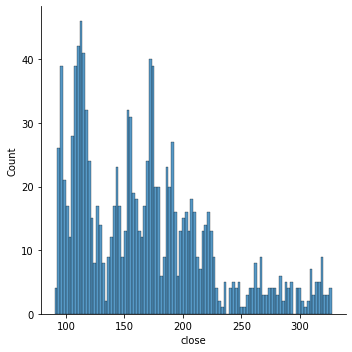

In [8]:
sns.displot(stock_prices, x = 'close', bins=100)

"closing price" generally refers to the last price at which a stock trades during a regular trading session. It is the standard benchmark used by investors to track its performance over time. From the close feature distribution above, we can see that the distribution is skewed to the right (positively skewed). There are many outliers (less amount of companies) who has a closing price which is more than 350.

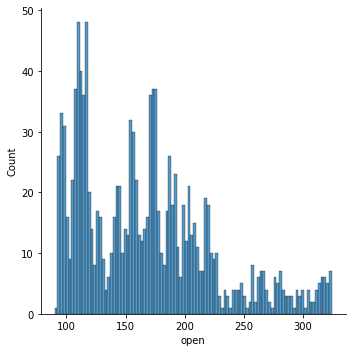

In [9]:
sns.displot(stock_prices, x = 'open', bins=100)

The opening price of a stock is the price from the first transaction of a business day. It is the price at which a security first trades upon the opening of an exchange on a trading day. From the histogram distribution graph above, we can observe that it is also skewed to the right. There are some companies (outliers) who start their first transaction (opening price) above 360.

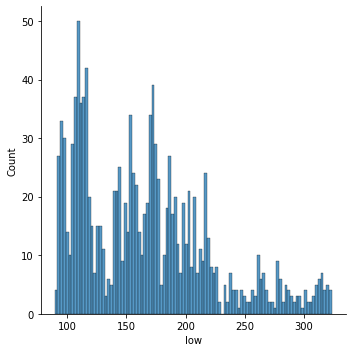

In [10]:
sns.displot(stock_prices, x = 'low', bins=100)

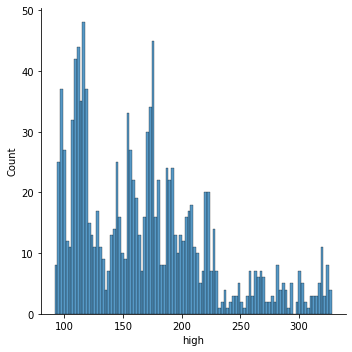

In [11]:
sns.displot(stock_prices, x = 'high', bins=100)

The low feature shows the lowest price at which a stock trades over the course of a trading day. High feature shows the highest price at ehich a stock traded during the course of the trading day. These both features histogram distribution are also skewed to the right.

#### ii. Correlation Matrix

<AxesSubplot:>

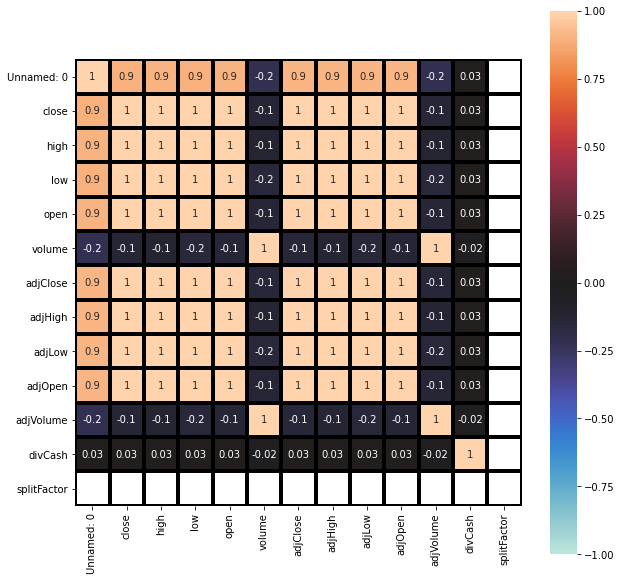

In [12]:
# check for any correlation
plt.figure(figsize = (10,10))
sns.heatmap(stock_prices.corr(), annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, linewidth = 3, 
           linecolor = "black", square = True)

The heatmap is used to understand the available stock's volume correlation with other prices(open, close, low, high) for future applications. 

#### iii. Trend of the open and close prices in the stock market.

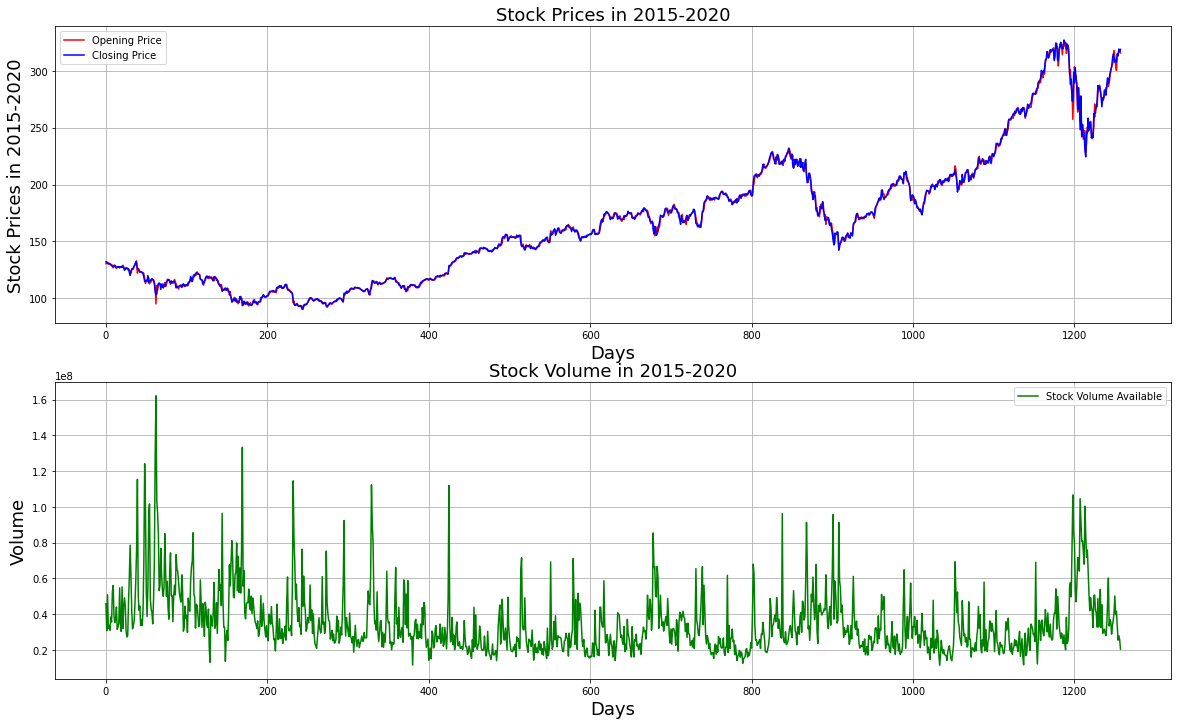

In [51]:
plt.figure(figsize = (20, 12))
x = np.arange(0, stock_prices.shape[0], 1)
plt.subplot(2,1,1)
plt.plot(x, stock_prices.open.values, color = "red", label = "Opening Price")
plt.plot(x, stock_prices.close.values, color = "blue", label = "Closing Price")
plt.title("Stock Prices in 2015-2020", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.ylabel("Stock Prices in 2015-2020", fontsize = 18)
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")

plt.subplot(2,1,2)
plt.plot(x, stock_prices.volume.values, color = "green", label = "Stock Volume Available")
plt.title("Stock Volume in 2015-2020", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.ylabel("Volume", fontsize = 18)
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")
plt.show()

We can observe that the Apple's opening and closing price has an uprising trend throughout 2015-2020. This may due to the increase of popularity of Apple's products and the right business strategies being implemented by the company. However, Apple's company has a constant pattern when it comes to its stock volume in the market.

The reset_index() function is used to generate a new DataFrame or Series with the index reset. It sets a list of integer ranging from 0 to length of data as index. For a Series with a MultiIndex, only remove the specified levels from the index. 

In [14]:
df1=stock_prices.reset_index()['close']

In [15]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

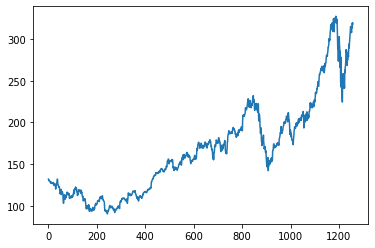

In [16]:
plt.plot(df1)

The closing price has an increasing trend.

### 6. Modelling

#### i. Scaling

It refers to putting the values in the same range or same scale so that no variable is dominated by the other. The skewness of the data distribution decreases a lot after scaling, as a result of which gradient descent (optimization algorithm) converges faster.

**MinMaxScaler** is used to scale all the prices values between 0 and 1, that is the feature range.

In [17]:
#df1 focusing on close feature
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


#### ii. Split into train and test data

In [19]:
#splitting the dataset into train and test split
training_size= int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data= df1[0:training_size,:], df1[training_size:len(df1),:1]

In [20]:
training_size, test_size

(817, 441)

In [21]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [22]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

#### iii. Dataset for Deep Learning

LSTM model for time-series prediction:
we need to converse the dataset's shape from 1-D to 3-D tensor. For this we grouped the values from the past **time_step** days into one and stacked such units one behind the other.

In [23]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ### i=0, 0,1,2,3,.......
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4

time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [25]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

#### iv. Long Short Term Memory (LSTM)

Human do not start thinking from scratch and we understand each word based on our understanding from the previous words. Traditional neural network is not capable of does such thing. LSTM is a special kind of RNN, capable of learning long-term dependencies. 

Using Keras API of Tensorflow a model was prepared having layers of LSTM cells stacked onto each other followed by a general Artificial Neural Network (ANN).

- ReLU activation function was used in all the layers with dropout ranging from 0.2-0.4.
- Adam Optimizer and MSE(Mean Squared Error) loss function was used.

In [27]:
import tensorflow as tf

In [28]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor= "loss", factor = 0.5, patience = 10,
                                                 min_lr = 0.000001, verbose = 1)
monitor_es = tf.keras.callbacks.EarlyStopping(monitor= "loss", patience = 25, restore_best_weights= False, verbose = True)

In [29]:
## Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(units = 128, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units = 10, activation = "relu"))
model.add(tf.keras.layers.Dense(units = 1, activation = "relu"))

In [31]:
model.compile(tf.keras.optimizers.Adam(lr = 0.001), loss = "mean_squared_error")

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          66560     
_________________________________________________________________
dropout (Dropout)            (None, 100, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 128)          131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [33]:
#reshape input to be [samples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=30, verbose=1)

Epoch 1/100
24/24 [==============================] - 40s 1s/step - loss: 0.0183 - val_loss: 0.0051
Epoch 2/100
24/24 [==============================] - 26s 1s/step - loss: 0.0016 - val_loss: 0.0047
Epoch 3/100
24/24 [==============================] - 26s 1s/step - loss: 0.0012 - val_loss: 0.0039
Epoch 4/100
24/24 [==============================] - 26s 1s/step - loss: 9.8755e-04 - val_loss: 0.0077
Epoch 5/100
24/24 [==============================] - 26s 1s/step - loss: 0.0012 - val_loss: 0.0030
Epoch 6/100
24/24 [==============================] - 26s 1s/step - loss: 0.0011 - val_loss: 0.0089
Epoch 7/100
24/24 [==============================] - 26s 1s/step - loss: 0.0014 - val_loss: 0.0029
Epoch 8/100
24/24 [==============================] - 26s 1s/step - loss: 0.0011 - val_loss: 0.0083
Epoch 9/100
24/24 [==============================] - 26s 1s/step - loss: 8.9181e-04 - val_loss: 0.0032
Epoch 10/100
24/24 [==============================] - 26s 1s/step - loss: 7.8624e-04 - val_loss: 0.00

24/24 [==============================] - 25s 1s/step - loss: 3.4317e-04 - val_loss: 9.0685e-04
Epoch 81/100
24/24 [==============================] - 25s 1s/step - loss: 3.2929e-04 - val_loss: 0.0032
Epoch 82/100
24/24 [==============================] - 25s 1s/step - loss: 4.5677e-04 - val_loss: 9.7707e-04
Epoch 83/100
24/24 [==============================] - 25s 1s/step - loss: 3.5502e-04 - val_loss: 9.2276e-04
Epoch 84/100
24/24 [==============================] - 25s 1s/step - loss: 3.5634e-04 - val_loss: 9.3728e-04
Epoch 85/100
24/24 [==============================] - 25s 1s/step - loss: 3.2030e-04 - val_loss: 8.9588e-04
Epoch 86/100
24/24 [==============================] - 25s 1s/step - loss: 3.4893e-04 - val_loss: 0.0011
Epoch 87/100
24/24 [==============================] - 25s 1s/step - loss: 2.7020e-04 - val_loss: 8.5505e-04
Epoch 88/100
24/24 [==============================] - 25s 1s/step - loss: 3.0572e-04 - val_loss: 9.3376e-04
Epoch 89/100
24/24 [=============================

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.73486650489195

In [54]:
from sklearn.metrics import r2_score
r2_score(y_train,train_predict)

-1065686.941151032

The r2_score shows that the learned model is worse than the null model. The modelling can be improved by decreasing the value of the batch_size to increase the amount of data being considered in the epoches (by performing more iterations = mini batches). **Batch_size** is the amount of samples you feed in your network.

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

230.2807977634995

- RMSE of test > RMSE of train => OVER FITTING of the data.
- RMSE of test < RMSE of train => UNDER FITTING of the data.

From the RMSE result, overfitting might have occured.

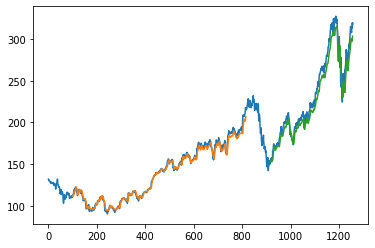

In [57]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The graph shows the comparison between the train predict (orange colour) and test predict (green colour) from the original data.

#### V. Prediction

In [40]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9170383]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

8 day output [[0.7856388]]
9 day input [0.93869797 0.93304061 0.94950604 0.96424048 0.95512117 0.95989192
 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106
 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9

16 day output [[0.6984044]]
17 day input [0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.91703832
 0.90736383 0.8885104

24 day output [[0.61420274]]
25 day input [0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.91703832 0.90736383 0.88851041
 0.8670848  0.84660959 0.82833821 0.81235701 0.7982884  0.78563881
 0.77394688 0.76283681 0

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

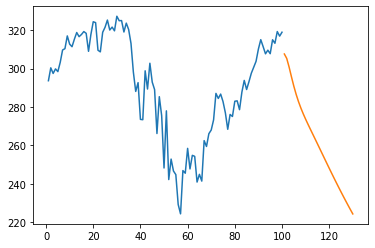

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

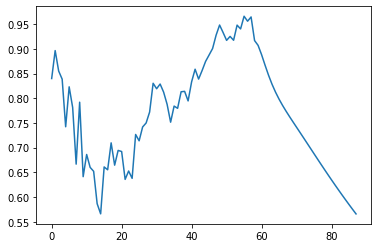

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

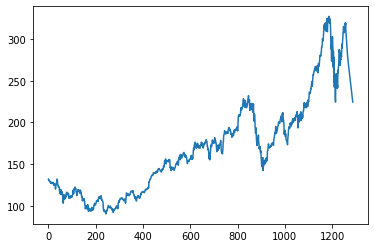

In [48]:
plt.plot(df3)

The prediction shows that there will be slight decrease in the closing price for the next 10 days.